<a href="https://colab.research.google.com/github/RaiqaRasool/ml_training/blob/main/7_Layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Layers
Layers discussed:

1. Fully Connected (Dense) Layer - nn.Linear
2. Convolutional Layer
3. Pooling Layer
4. Dropout Layer
5. Batch Normalization Layer
6. Recurrent Layer (RNN, LSTM, GRU)
7. Transformer



## Dense Layer `(nn.Linear)` -- 2D input only .shape = (batch_size,input_size)
`Even if you are working with a single input, you should add an extra dimension to represent the batch size. Input and output batch size always remain same but output each data point length can be different than input`

In [ ]:
import torch
import torch.nn as nn

### Scalar

##### Input preparation for Linear layer

In [ ]:
input=torch.tensor(4.)  # needed to be float as weights are float too and mat1 and mat2 should have same datatype
input.shape

torch.Size([])

In [ ]:
input=input.unsqueeze(0)
input.shape, input #1D

(torch.Size([1]), tensor([4.]))

In [ ]:
input=input.unsqueeze(0)
input.shape, input #2D -- ready for linear layer

(torch.Size([1, 1]), tensor([[4.]]))

##### Model initialization

In [ ]:
model=nn.Linear(input.shape[1],2) #output shape will be (input.shape[0],2)
model(input)

tensor([[2.6815, 0.7771]], grad_fn=<AddmmBackward0>)

In [ ]:
model=nn.Linear(input.shape[1],5) #output.shape[1]= 5
model(input)

tensor([[-3.0011, -1.8380, -1.5534, -2.6417, -0.2251]],
       grad_fn=<AddmmBackward0>)

### Vector

##### Input preparation for Linear layer

In [ ]:
input=torch.randn(5)
input.shape #1D

torch.Size([5])

In [ ]:
input=input.unsqueeze(0)
input.shape #2D -- batch_size=1, input_size=5

torch.Size([1, 5])

##### Model initialization

In [ ]:
model=nn.Linear(input.shape[1],1)
model(input)

tensor([[-0.2903]], grad_fn=<AddmmBackward0>)

### Matrix

In [ ]:
input=torch.randn(3,8) # batch of 3 data points each of length 8
input,input.shape

(tensor([[-0.8877,  0.5589, -0.9284,  0.2638,  0.3865,  0.4690,  0.7408, -0.0692],
         [-0.9729, -0.5995, -0.5392,  0.6817,  1.0942, -0.5135, -1.6977,  0.4975],
         [-1.7352,  0.3303, -0.1278,  1.6519,  1.0609,  0.0554,  1.7864, -0.1639]]),
 torch.Size([3, 8]))

In [ ]:
model=nn.Linear(input.shape[1],5)

In [ ]:
model(input) # output is a batch of 3 with length of each equal to 5

tensor([[-0.8965, -0.1802, -0.5719, -0.2444,  0.5147],
        [ 0.1034,  0.2418, -0.3384,  0.0944,  0.1544],
        [-1.3951, -0.8635, -1.6050, -0.9343,  1.0534]],
       grad_fn=<AddmmBackward0>)

### Tensor

##### 3D Tensor (one image)

In [ ]:
input=torch.randn(3,5,5) # one image with three channels
input.shape

torch.Size([3, 5, 5])

In [ ]:
flattened_image=input.view(1,-1)

In [ ]:
flattened_image.shape,flattened_image

(torch.Size([1, 75]),
 tensor([[ 0.4162,  2.0206,  0.9126, -0.3866,  1.4161,  0.3294,  1.6526,  0.6594,
           0.5001, -2.4255, -1.2787, -0.3596, -0.4397,  1.3108, -0.8028,  0.0918,
          -2.1638,  1.6110, -0.2180, -0.0803,  1.4637,  0.0816,  0.1082, -0.0191,
          -0.3243,  1.9196,  0.9102, -1.1283, -0.4406,  1.3143, -0.4867,  1.2873,
           0.0211,  0.7991, -0.4079,  0.2982,  0.8687, -0.9220, -0.2073, -0.1015,
           1.4433, -0.4142,  0.7382, -1.3669,  1.2289, -0.2272,  0.6644,  0.4128,
           1.8189,  1.2196, -0.4952, -0.1414,  0.7924, -0.1583,  1.5227,  0.0430,
           0.3893, -0.0815,  0.8887,  0.3572, -0.1158,  0.1548,  0.6541,  1.2165,
           0.2760, -0.2892, -1.0382, -1.4647,  1.0138,  0.1559,  0.0713,  0.8063,
          -0.0953,  0.4947,  0.7453]]))

In [ ]:
model=nn.Linear(flattened_image.shape[1],4) # 75 input to 4 output of batch 1

In [ ]:
model(flattened_image)

tensor([[-0.2190,  0.1244, -0.5459,  1.2035]], grad_fn=<AddmmBackward0>)

##### 4D Tensor (batch of images)

In [ ]:
input=torch.randn(5,3,2,2) #batch of 5 rgb images of size 2 by 2
input.shape, input

(torch.Size([5, 3, 2, 2]),
 tensor([[[[ 9.0368e-01, -2.5509e-01],
           [ 3.5766e-01, -1.5153e+00]],
 
          [[-7.3570e-01,  1.9678e-01],
           [-6.2169e-01, -6.3124e-01]],
 
          [[-4.3807e-01, -5.1239e-01],
           [-4.6905e-01, -4.6107e-01]]],
 
 
         [[[ 1.0498e+00, -4.8479e-01],
           [-1.2236e+00,  8.5175e-01]],
 
          [[ 5.9461e-01,  2.2837e-01],
           [-2.2460e+00,  1.5308e+00]],
 
          [[-4.2225e-01,  1.9882e-01],
           [-2.0032e+00, -8.8111e-01]]],
 
 
         [[[ 1.0937e+00,  5.4494e-01],
           [ 1.4776e+00,  1.1494e-03]],
 
          [[ 2.0263e-01,  2.1724e+00],
           [-8.1181e-01,  1.3381e-01]],
 
          [[ 2.0608e-01,  4.6331e-01],
           [-2.2816e-02,  6.6122e-01]]],
 
 
         [[[-1.4409e-01, -6.5565e-02],
           [-9.6574e-01, -1.9926e-01]],
 
          [[-1.3056e-01,  7.5614e-01],
           [-6.4310e-01,  1.2153e+00]],
 
          [[-7.6127e-01, -2.2336e+00],
           [-1.2508e-01,  9.6948e-

In [ ]:
input=input.view(input.shape[0],-1) # -1 as second arg adjust all the remaining elements in this dim -- (batch_size,3*2*2)
input.shape

torch.Size([5, 12])

In [ ]:
model=nn.Linear(input.shape[1],24)
model(input) # output = batch of 5 datapoints with each of length 24

tensor([[ 0.0585, -0.7096,  0.0058,  0.1185, -0.6390,  0.0305, -0.1158, -0.4213,
         -0.6294, -0.0989, -0.5064,  0.8272, -0.0708,  0.1998, -0.9683,  0.4492,
         -0.6693, -0.5318, -0.0774,  0.1644, -0.4504,  0.5158,  0.4498, -0.5372],
        [-0.0576, -0.0856,  0.2581,  0.2658, -0.2735, -0.7777, -1.1239, -1.1011,
          1.1810,  1.2452,  0.1039, -0.0719, -0.8328, -0.8279, -0.3986, -0.9016,
          0.5757, -0.3830,  0.0745, -0.9567, -0.6612, -0.3153,  0.2573,  0.8959],
        [-0.9415, -0.7363,  0.1603, -0.1438, -0.8056,  0.3152,  0.3112,  0.1220,
         -0.0373,  0.1894, -0.2095,  0.4371,  0.4021,  0.5422, -0.0510, -0.5914,
         -0.4021,  0.3254, -0.4129, -0.5451, -0.0852, -0.0219, -0.5807, -0.8710],
        [ 0.1499, -0.5062, -0.6375,  0.1653, -0.4776, -0.0809, -0.0062, -0.6016,
         -0.5522, -0.6284, -0.7045, -0.2489,  0.3511,  0.2680, -0.9011,  0.0674,
         -0.3803, -0.4561,  0.5177,  0.6564, -0.0342, -0.3129,  0.0334, -0.0286],
        [-0.6412,  0.348

## CNN

`scalar, vector, matrices and 3D tensors should be unsqueezed to 4D tensor for conv2D and 5D for conv3D`

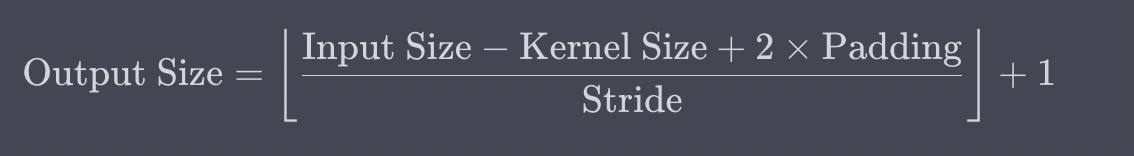

### Conv2D  -- `4Dinput.shape=(batch_size, channels, height, width)`

In [ ]:
import torch
import torch.nn as nn

# Example for 2D convolution
in_channels = 3  # Number of input channels (e.g., for RGB images)
out_channels = 64  # Number of output channels (number of filters)
kernel_size = 3  # Size of the convolutional kernel

# Example input tensor for 2D convolution
# Assuming a batch of RGB images with size (batch_size, channels, height, width)
input_tensor_2d = torch.randn(32, in_channels, 128, 128)

# Apply 2D convolution
conv_layer_2d = nn.Conv2d(in_channels, out_channels, kernel_size)
output_tensor_2d = conv_layer_2d(input_tensor_2d)

# Print the shape of the output tensor
print("2D Convolution Output Shape:", output_tensor_2d.shape)

2D Convolution Output Shape: torch.Size([32, 64, 126, 126])


**Output Size:** By default padding=0 and stride=1 so using output size formula given above we get: (128-3) + 1 = 125 + 1 = 126

#### **Keeping output image size same as input**


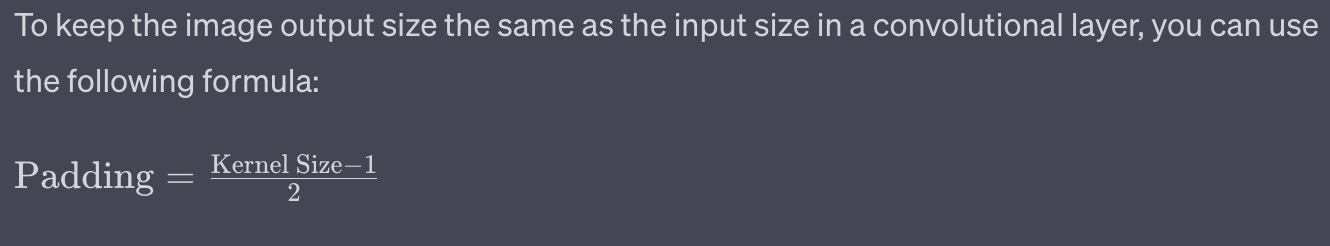

padding=(3-1)/2=2/2=1

In [ ]:
input=torch.randn(1,3,3,3)
model=nn.Conv2d(input.shape[1],input.shape[1],kernel_size=3,padding=1)
output=model(input)
output.shape,output

(torch.Size([1, 3, 3, 3]),
 tensor([[[[-0.3002, -0.3423,  0.3059],
           [ 0.2601,  0.8793, -0.7966],
           [-0.0209, -0.0814,  0.4434]],
 
          [[ 0.4769, -0.7410,  0.4774],
           [ 1.0872,  0.3791, -1.0165],
           [-0.2802,  0.2441,  0.0225]],
 
          [[ 0.4102,  0.5678, -0.0358],
           [-0.8860, -0.3985, -0.0894],
           [ 0.0741, -0.2363,  0.1038]]]], grad_fn=<ConvolutionBackward0>))

###Conv3D `5Dinput.shape=(batch_size, channels, depth, height, width)`

In [ ]:
import torch
import torch.nn as nn

# Example for 3D convolution
in_channels = 3  # Number of input channels (e.g., for RGB videos/volumetric data)
out_channels = 64  # Number of output channels (number of filters)
kernel_size = 3  # Size of the convolutional kernel

# Example input tensor for 3D convolution
# Assuming a batch of volumetric data with size (batch_size, channels, depth, height, width)
input_tensor_3d = torch.randn(32, in_channels, 64, 64, 64) #5D

# Apply 3D convolution
conv_layer_3d = nn.Conv3d(in_channels, out_channels, kernel_size)
output_tensor_3d = conv_layer_3d(input_tensor_3d)

# Print the shape of the output tensor
print("3D Convolution Output Shape:", output_tensor_3d.shape)

3D Convolution Output Shape: torch.Size([32, 64, 62, 62, 62])


## Pooling Layer -- `4Dinput.shape=(batch_size, channels, height, width)`



### MaxPool2d

In [ ]:
input=torch.randn(1,1,8,8)
input.shape

torch.Size([1, 1, 8, 8])

##### kernel_size and stride are 2

In [ ]:
model=nn.MaxPool2d(kernel_size=2,stride=2)
output=model(input)
output.shape

torch.Size([1, 1, 4, 4])

##### only kernel_size = 2

In [ ]:
model=nn.MaxPool2d(kernel_size=2,stride=1)
model(input).shape # same as from output size formula for conv layer that is (input_size-kernel_size)/stride + 1 =(8-2)+1=7

torch.Size([1, 1, 7, 7])

### AvgPool2d

In [ ]:
model=nn.AvgPool2d(kernel_size=2,stride=2)
output=model(input)
output.shape

torch.Size([1, 1, 4, 4])

## Pooling Layer versus Convolutional layer

**Operation:** Convolutional layers apply a convolution operation, capturing spatial hierarchies and learning features. Max pooling layers perform downsampling by selecting the maximum value from local regions.

**Learnable Parameters:** Convolutional layers have learnable weights associated with each filter, allowing them to adapt to specific features. Max pooling layers do not have learnable parameters; they operate on a fixed mechanism.

**Purpose:** Convolutional layers are feature extractors, learning hierarchical representations of the input data. Max pooling layers are downsampling operations, reducing spatial dimensions and providing invariance to translation.

## Dropout layer -- any number of dimensions acceptable as input

The dropout process looks like this:

* For each neuron, a random number is generated from a uniform distribution between 0 and 1.
* If the generated number is less than 'p,' the neuron is dropped out (its output is set to zero).
* If the generated number is greater than or equal to 'p,' the neuron is kept (its output remains unchanged).

Using the dropout layer in PyTorch involves creating an instance of the `nn.Dropout` module and applying it to the output of a layer in your neural network. Here's an example of how to use a dropout layer:

In [ ]:
import torch
import torch.nn as nn

p = 0.5  # Probability of an element to be zeroed
dropout_layer = nn.Dropout(p)

In this example:
- `p` is the probability of an element to be zeroed. It represents the dropout rate, and a common value is 0.5.
- `nn.Dropout(p)` is created as a dropout layer with the specified dropout rate.

During the forward pass, the dropout layer randomly sets a fraction of the input elements to zero, helping to prevent overfitting and improving the generalization of the model. It's typically applied after fully connected layers or convolutional layers.

It's important to note that dropout should be used during training and turned off during evaluation. PyTorch handles this automatically, so you only need to set the model to evaluation mode when making predictions:

```python
# Set the model to evaluation mode
dropout_layer.eval()

# Make predictions without dropout
prediction = dropout_layer(input_tensor)
```

This ensures that dropout is not applied during inference.

### Scalar

In [ ]:
input=torch.tensor(1.) # input should be float
output=dropout_layer(input)
output # each non-zero value is multiplied by 1/(1-p)=1/0.5=2

tensor(2.)

In [ ]:
output/input

tensor(2.)

**Note:** Refer to this link for understanding change in non-zero values https://stackoverflow.com/questions/61873516/using-dropout-on-output-of-embedding-layer-changes-array-values-why. After reading what is mentioned in this link read following points:

* During training, the neuron needs to learn to account for the fact that, on average, half of its activations will be zero. So, it effectively "boosts" the magnitudes of the activations by 1 / (1 - p). In this case, 1 / (1 - 0.5) = 2.0.
* The effect of this scaling will be that if one take average of output (that is sum of all values and divide by num of elements) both in case of inference and training their values will be a bit closer thus generating almost same results. But they will not be exactly same, it's just a way of reducing that gap

###Vector

In [ ]:
input=torch.randn(3)
input,dropout_layer(input) # each non-zero value multiplied by 2.i.e.(1/(1-p))

(tensor([ 0.3309,  1.0998, -0.6009]), tensor([ 0.6617,  2.1997, -1.2018]))

### Matrix

In [ ]:
input=torch.randn(2,3)
input,dropout_layer(input) # each non-zero value multiplied by 2.i.e.(1/(1-p))

(tensor([[-0.6368, -0.4105, -0.9556],
         [-0.1265,  0.7720,  1.0982]]),
 tensor([[-0.0000, -0.0000, -0.0000],
         [-0.2530,  1.5440,  2.1964]]))

### Tensor

In [ ]:
input=torch.randn(2,3,2)
input,dropout_layer(input)

(tensor([[[-0.6037,  0.5799],
          [-0.7526,  0.2691],
          [-0.2839, -1.5384]],
 
         [[-0.0324,  0.5479],
          [ 1.9699,  0.2545],
          [-0.3466, -0.9529]]]),
 tensor([[[-0.0000,  0.0000],
          [-0.0000,  0.0000],
          [-0.5677, -0.0000]],
 
         [[-0.0000,  0.0000],
          [ 0.0000,  0.0000],
          [-0.6933, -1.9059]]]))

In [ ]:
dropout_layer.eval()
input,dropout_layer(input)

(tensor([[[-0.6037,  0.5799],
          [-0.7526,  0.2691],
          [-0.2839, -1.5384]],
 
         [[-0.0324,  0.5479],
          [ 1.9699,  0.2545],
          [-0.3466, -0.9529]]]),
 tensor([[[-0.6037,  0.5799],
          [-0.7526,  0.2691],
          [-0.2839, -1.5384]],
 
         [[-0.0324,  0.5479],
          [ 1.9699,  0.2545],
          [-0.3466, -0.9529]]]))

##Batch Normalization
`Used for for normalizing the activations in a neural network.`


The key steps of BatchNorm are as follows:

* For 2D (image) and 3D (video analysis) data each channel values are used for finding mean and variance for that channnel. However, for 1D this mean and variance is found for each feature that is for age feature only its mean and variance will be find using age values. This gives an estimate of the data distribution within the batch.

* The input activations are then normalized by subtracting the mean and dividing by the standard deviation (after adding a small epsilon for numerical stability).

* The resulting activations are then scaled and shifted using learnable parameters called gamma and beta. These parameters allow the network to adapt and model the best scaling and shifting for the normalized activations.

* The formula for BatchNorm can be summarized as:

  ```y = gamma * (x - mean) / sqrt(variance + epsilon) + beta```

  Here, x represents the input activations, mean and variance are calculated over the mini-batch, gamma and beta are learnable parameters, and epsilon is a small constant to prevent division by zero.


### nn.BatchNorm1d `(2D input - (batch_size,input_size))`
Used for batch normalization in 1D data, such as the activations of a fully connected (dense) layer.

In [ ]:
import torch
import torch.nn as nn

# Define the number of features (input dimensions) and create a BatchNorm1d layer.
num_features = 64
batchnorm_1d = nn.BatchNorm1d(num_features)

# Example input data (batch of size 32 with 64 features):
input_data = torch.randn(32, num_features)

# Apply batch normalization to the input data:
batchnorm_1d(input_data)

tensor([[ 1.2305,  0.5989, -0.5528,  ...,  0.6291,  1.4753, -0.2184],
        [ 0.6403, -2.6451, -1.5178,  ..., -1.3031,  0.5511, -1.3790],
        [ 0.2051,  0.9713, -0.6188,  ...,  0.8860,  0.5909, -0.1651],
        ...,
        [-1.6529, -1.0208, -0.1979,  ...,  1.3638,  0.3388, -0.6120],
        [ 0.5572, -1.2322, -1.1751,  ..., -0.3401,  0.3257, -0.1173],
        [-1.2538,  1.3720, -0.5862,  ...,  0.8383,  1.2061, -1.0674]],
       grad_fn=<NativeBatchNormBackward0>)

### nn.BatchNorm2d `4D input - (batch_size,channels,height,width)`
Used for batch normalization in 2D data, such as the activations of a convolutional layer.


In [ ]:
import torch
import torch.nn as nn

# Define the number of channels and create a BatchNorm2d layer.
num_channels = 3
batchnorm_2d = nn.BatchNorm2d(num_channels)

# Example input data (batch of size 32 with 3 channels, height 64, and width 64):
input_data = torch.randn(2, num_channels, 3, 4)

# Apply batch normalization to the input data:
batchnorm_2d(input_data)

tensor([[[[ 2.2271, -0.0222, -1.1048, -1.5423],
          [ 0.5324, -1.1036, -1.1580,  1.7708],
          [ 0.5021, -0.2642, -0.2558, -0.7687]],

         [[-0.3683, -1.3339, -0.5941, -0.9039],
          [ 1.1946, -1.1223,  1.1209,  0.6150],
          [ 0.0998,  1.0257,  1.3652,  0.0709]],

         [[ 2.0498, -0.0785, -0.5476, -0.8590],
          [ 0.2465, -0.0418, -0.4744,  0.1817],
          [ 1.0182, -1.1808, -0.7016,  0.5643]]],


        [[[-0.9865,  0.8895,  0.3273,  1.4438],
          [ 1.1605, -1.3929,  0.3278, -0.1082],
          [-0.6258, -0.5496,  0.6519,  0.0496]],

         [[-0.3393, -0.3016, -0.7929, -0.9892],
          [ 2.3237,  0.7681, -1.1144, -1.1914],
          [-0.9949, -0.5100,  1.0309,  0.9413]],

         [[-1.7667,  1.5739, -1.4232,  1.1446],
          [ 0.2346, -0.3369, -0.7895,  0.4131],
          [-1.7499,  0.7065,  1.1128,  0.7040]]]],
       grad_fn=<NativeBatchNormBackward0>)

### nn.BatchNorm3d `5D input - (batch_size,channels, depth,height,width)`
Used for batch normalization in 3D data, such as the activations of a 3D convolutional layer (used in applications like video analysis).

In [ ]:
import torch
import torch.nn as nn

# Define the number of channels and create a BatchNorm3d layer.
num_channels = 3
batchnorm_3d = nn.BatchNorm3d(num_channels)

# Example input data (batch of size 32 with 3 channels, depth 16, height 64, and width 64):
input_data = torch.randn(2, num_channels, 2, 2, 3)

# Apply batch normalization to the input data:
batchnorm_3d(input_data)

tensor([[[[[-8.5591e-01,  6.3258e-01, -1.2983e+00],
           [ 1.8176e+00, -1.0299e-01, -2.0984e+00]],

          [[-5.8017e-01, -7.1568e-01, -5.3690e-01],
           [-1.9349e-01,  4.2353e-01,  5.0391e-01]]],


         [[[-3.1138e-01, -1.5463e+00, -8.1643e-01],
           [ 9.5183e-01,  3.7878e-01,  4.2795e-01]],

          [[-1.3101e-01,  5.8899e-01,  1.6712e+00],
           [ 8.6900e-01,  6.5139e-01, -5.1035e-01]]],


         [[[ 4.1660e-01, -8.3965e-01,  5.6777e-01],
           [ 5.5129e-01,  2.4266e+00, -1.0323e+00]],

          [[ 3.0919e-01, -2.3381e-01, -7.3380e-02],
           [-1.1001e+00, -1.2140e+00,  1.4746e+00]]]],



        [[[[ 6.8394e-01,  1.4007e+00,  2.3364e-03],
           [-7.9252e-01,  4.1357e-01,  3.5573e-01]],

          [[ 9.4859e-01, -2.8766e-01,  1.0609e+00],
           [ 1.4132e+00, -1.0052e-01, -2.0940e+00]]],


         [[[ 2.1676e+00, -6.9114e-01, -1.6109e+00],
           [ 1.6727e-01,  1.1043e+00,  6.7458e-01]],

          [[-1.8635e+00, -8.8994e-01

## RNN, LSTM, GRU
`inputs and outputs for all these three layer types are same`

### Input
`input is 3D tensor with dimensions [sequence_length, batch_size, input_size]`
* **Sequence Length:** Maximum sequence length in the batch .i.e. number of words in sentence
* **Batch size:** Number of sequences in a mini-batch.i.e. number of sentences in a batch
* **input_size:** Dimension of the feature vector at each time step .i.e. length of word_embedding

In [ ]:
sequence_length=2
batch_size=1
input_size=3
input=torch.randn(2,1,3)
input

tensor([[[ 0.1193, -1.2038, -0.0367]],

        [[-1.1602, -0.3931,  1.7910]]])

### Parameters

In the context of these layers in PyTorch, the parameters `input_size`, `hidden_size`, and `num_layers` are essential for configuring the model

Here is detail of these parameters:

1. **`input_size`**:
   - input_size refers to the `dimensionality of the input features` at each time step or sequence step. In the case of text data, this often corresponds to the dimension of word embeddings. It defines the number of features for each input element within a sequence. For example, if you're processing text data and using 50-dimensional word embeddings for each word, input_size would be 50.

2. **`hidden_size`**:
   - hidden_size represents the number of hidden units or neurons in the layer. It is same as `output_size` in `nn.Linear` and determines output inner most dim length . These hidden units capture and store information from previous time steps in the sequence. The hidden size defines the internal state of the layer. You can think of it as the "memory" or capacity of the model to remember and utilize past information. A larger hidden_size allows the model to capture more complex dependencies in the data but also increases the model's complexity.

3. **`num_layers`**:
   - num_layers specifies the `number of layers in the model`. A single-layer model(num_layers=1) captures sequential dependencies within the input data. If you use multiple layers (num_layers > 1), the model becomes a deep layered network, and each layer feeds into the next. Deep models can capture more complex hierarchical patterns in the data. For example, with num_layers=2, you have a two-layer LSTM where the output of the first layer serves as the input to the second layer.

In [ ]:
import torch
import torch.nn as nn

input_size = input.shape[2]  # Dimension of input features
hidden_size = 5  # Number of hidden units in the LSTM
num_layers = 2  # Number of LSTM layers

# Create an LSTM layer
lstm_layer = nn.LSTM(input_size, hidden_size, num_layers)
rnn_layer=nn.RNN(input_size,hidden_size,num_layers)
gru_layer=nn.GRU(input_size,hidden_size,num_layers)
lstm_layer,rnn_layer,gru_layer

(LSTM(3, 5, num_layers=2), RNN(3, 5, num_layers=2), GRU(3, 5, num_layers=2))

In this example, each layer has 2-layers (num_layers=2), where the input features are 50-dimensional, and each layer has 100 hidden units.

### Output
`output_from_layer=output, (hidden_state, cell_state)`

In [ ]:
output, (hidden_state, cell_state) = lstm_layer(input)

In [ ]:
print("Input: ",input)
print()
print()
print("Output: ",output)
print("Input shape: ",input.shape) # [sequence_length, batch_size, feature_size]
print("Output shape: ",output.shape) # [sequence_length, batch_size, hidden_size]
print()
print()
print("Hidden state: ",hidden_state)
print("Hidden state shape: ",hidden_state.shape) # [num_layers, batch_size, hidden_size]
print()
print()
print("Cell State: ",cell_state)
print("Cell state shape: ",cell_state.shape) # [num_layers, batch_size, hidden_size]

Input:  tensor([[[ 0.1193, -1.2038, -0.0367]],

        [[-1.1602, -0.3931,  1.7910]]])


Output:  tensor([[[-0.1005,  0.0319,  0.0785,  0.0018, -0.0938]],

        [[-0.1708,  0.0512,  0.1287,  0.0333, -0.1000]]],
       grad_fn=<MkldnnRnnLayerBackward0>)
Input shape:  torch.Size([2, 1, 3])
Output shape:  torch.Size([2, 1, 5])


Hidden state:  tensor([[[ 0.0650, -0.0339,  0.1692,  0.1725,  0.1933]],

        [[-0.1708,  0.0512,  0.1287,  0.0333, -0.1000]]],
       grad_fn=<StackBackward0>)
Hidden state shape:  torch.Size([2, 1, 5])


Cell State:  tensor([[[ 0.1453, -0.0711,  0.2852,  0.4222,  0.3854]],

        [[-0.2723,  0.0918,  0.2381,  0.0608, -0.1883]]],
       grad_fn=<StackBackward0>)
Cell state shape:  torch.Size([2, 1, 5])


#### **Hidden and cell state in detail:**

1. **Hidden State (h_t)**:
   - The hidden state, h_t, is influenced by the input at the current time step and the previous hidden state (h_{t-1}).
   - It can be thought of as capturing the immediate information relevant for the current prediction or output.
   - The hidden state is designed to capture short-term dependencies and immediate patterns within the sequence.

2. **Cell State (c_t)**:
   - The cell state, c_t, is an internal state that stores and manages information over extended sequences.
   - It captures and stores information from multiple time steps, making it suitable for modeling long-range dependencies.
   - The cell state's primary role is to manage memory and maintain information over the course of the sequence.

So, while the hidden state is focused on immediate and short-term information, the cell state acts as a long-term memory that can capture and retain patterns, dependencies, and information over a range of previous time steps. Both the hidden state and cell state are integral to the LSTM's ability to model sequences effectively, with the hidden state serving as the primary output and the cell state managing long-term context.

In [ ]:
print("RNN layer outputs (output,(hidden_state,cell_state): ")
rnn_layer(input)

RNN layer outputs (output,(hidden_state,cell_state): 


(tensor([[[ 0.1095,  0.6302, -0.6164,  0.1935, -0.4423]],
 
         [[-0.2320,  0.0042, -0.7919,  0.1719,  0.1665]]],
        grad_fn=<StackBackward0>),
 tensor([[[-0.3664, -0.7513, -0.4125, -0.7215,  0.6792]],
 
         [[-0.2320,  0.0042, -0.7919,  0.1719,  0.1665]]],
        grad_fn=<StackBackward0>))

In [ ]:
print("GRU layer outputs (output,(hidden_state,cell_state): ")
gru_layer(input)

RNN layer outputs (output,(hidden_state,cell_state): 


(tensor([[[-0.0363,  0.1769, -0.2116, -0.1647,  0.1480]],
 
         [[-0.0461,  0.2273, -0.3436, -0.3138,  0.2479]]],
        grad_fn=<StackBackward0>),
 tensor([[[ 0.4212,  0.4078, -0.0286, -0.0954,  0.1934]],
 
         [[-0.0461,  0.2273, -0.3436, -0.3138,  0.2479]]],
        grad_fn=<StackBackward0>))

## Transformer


`nn.Transformer` is a PyTorch module that implements the core components of the Transformer architecture, which is widely used in natural language processing tasks. See video on this link for deep understanding of transformers https://youtu.be/SZorAJ4I-sA?feature=shared

### Initialization
   - When you create an instance of `nn.Transformer`, you need to specify the dimensions of the model.
   - Typically, you provide the following arguments:
     - `d_model`: The dimension of the input and output feature vectors (commonly referred to as the hidden size).
     - `nhead`: The number of attention heads in the multi-head self-attention mechanism.
     - `num_encoder_layers`: The number of encoder layers in the Transformer.
     - `num_decoder_layers`: The number of decoder layers in the Transformer (used for sequence-to-sequence tasks).
     - `dim_feedforward`: The dimension of the feedforward neural network inside each layer.

In [ ]:
import torch
import torch.nn as nn

d_model = 4  # Hidden size
nhead = 2      # Number of attention heads
num_layers = 2  # Number of layers

# Create a Transformer model
transformer = nn.Transformer(d_model, nhead, num_layers)
transformer

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Transformer(
  (encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=4, out_features=4, bias=True)
        )
        (linear1): Linear(in_features=4, out_features=2048, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=2048, out_features=4, bias=True)
        (norm1): LayerNorm((4,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((4,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
    (norm): LayerNorm((4,), eps=1e-05, elementwise_affine=True)
  )
  (decoder): TransformerDecoder(
    (layers): ModuleList(
      (0-5): 6 x TransformerDecoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=4, out_features=4, b

### Input

The input to nn.Transformer is expected to be in the form of tensors with dimensions `[sequence_length, batch_size, d_model]`. These tensors represent sequences, where each element has a dimension of d_model.

In [ ]:
# Example input data
sequence_length = 2
batch_size = 2
input_data = torch.randn(sequence_length, batch_size, d_model)
input_data[0,:,:],input_data,input_data.shape

(tensor([[ 0.7465, -0.0621, -0.5430,  1.5333],
         [ 0.0638,  0.0911, -0.0814,  1.3126]]),
 tensor([[[ 0.7465, -0.0621, -0.5430,  1.5333],
          [ 0.0638,  0.0911, -0.0814,  1.3126]],
 
         [[-1.0802, -2.3244, -0.0794,  0.2027],
          [-0.5772,  1.4485,  0.0437,  0.6017]]]),
 torch.Size([2, 2, 4]))

### Output

During training, both source and target sequences are passed
```python
output = transformer(source_sequence, target_sequence)
```
The model uses the source sequence and the target sequence (with "start" tokens) to predict the next token in the target sequence. In this way, it learns to generate the target sequence from the source sequence. For actual sequence-to-sequence tasks, you would provide different source and target sequences.However during inference, you typically use the model to generate the target sequence from a given source sequence so both source_sequence and target_sequence are set equal to input_data as done in the following example too.

In [ ]:
output = transformer(input_data,input_data)
output,output.shape

(tensor([[[-0.7786,  0.2235,  1.5404, -0.9853],
          [ 1.0581, -1.4349, -0.4241,  0.8009]],
 
         [[-1.2087, -0.4659,  1.5154,  0.1592],
          [ 0.9782, -1.3454, -0.5798,  0.9470]]],
        grad_fn=<NativeLayerNormBackward0>),
 torch.Size([2, 2, 4]))

The output is a tensor with dimensions `[sequence_length, batch_size, d_model]`, providing updated representations of the input sequence.

partial derivative purpose
why invented
why needed inn deep learning
formula understanding, its derivationn
mathematical examples
how is pytorch implementing it -- what is annd how autograd doinng backward and forward -- follow alonng with manual calculations

